In [1]:
import talib as tl 
import tushare as ts

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mytools import Portfolio

plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [3]:
compare = ts.get_hist_data('399300')

In [3]:
compare.head(3)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2017-04-11,3503.83,3520.13,3517.33,3466.14,165945840.0,12.19,0.35,3511.574,3486.372,3474.353,145658486.4,123230875.2,109580361.6
2017-04-10,3519.46,3522.80,3505.14,3502.08,141887376.0,-12.32,-0.35,3499.318,3483.599,3469.881,130784816.0,119200874.4,104783879.6
2017-04-07,3514.45,3526.82,3517.46,3506.39,140293200.0,3.41,0.10,3485.642,3479.283,3465.971,125682726.4,114443942.4,101918030.0


In [4]:
zhaoshang = ts.get_hist_data('600999')

In [5]:
zhaoshang.head(3)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2017-04-11,16.38,16.48,16.45,16.24,107012.08,-0.03,-0.18,16.470,16.439,16.548,113550.76,99221.26,112660.22
2017-04-10,16.47,16.54,16.48,16.42,117988.33,0.01,0.06,16.434,16.453,16.557,105835.22,100669.01,110961.25
2017-04-07,16.50,16.51,16.47,16.39,132788.38,-0.01,-0.06,16.412,16.447,16.568,109113.17,101405.15,110866.47


In [5]:
test = Portfolio(zhaoshang)
df_ma15 = test.calc_ma15_portfolio()

最终资产价值 Final portfolio value: $1,855,265.88
累计回报率 Cumulative returns: 0.86 %
平均日收益率 Average daily return: 0.00120 %
年收益 Annual return: 0.30 %
日收益率方差 Var. daily return: 0.0004
波动率 Volatility: 0.33
夏普指数 Sharpe ratio: 0.77

最大回撤率 Max. drawdown: 38.01 %
回撤时间 Longest drawdown duration: 2015-04-10 00:00:00 
最长回撤时间 Time. drawdown: 440 days
回撤最高点位 High. drawdown: 2,782,346.90
回撤最低点位 Low. drawdown: 1,724,712.85


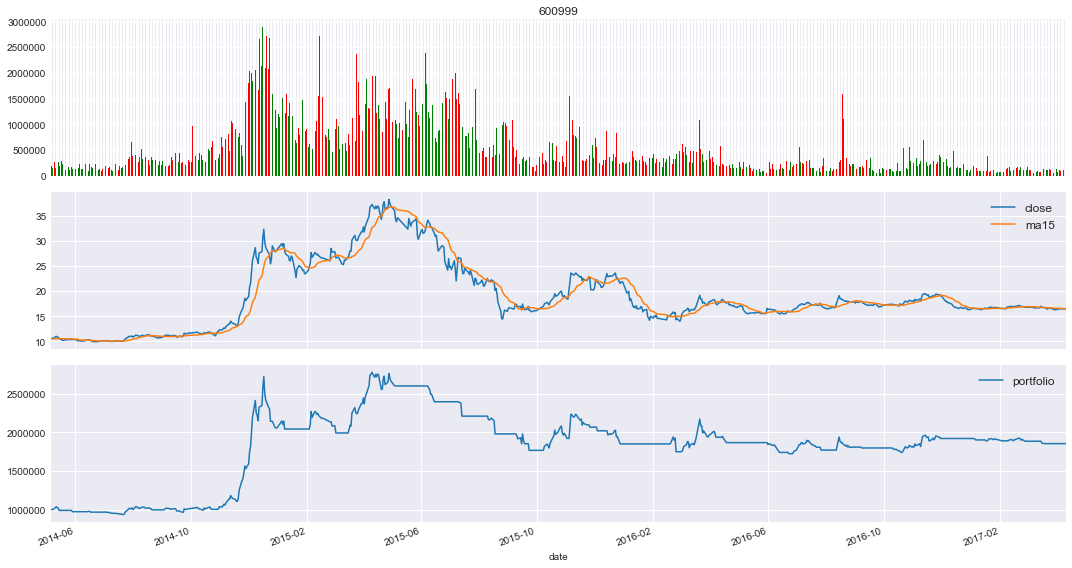

In [19]:
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
df_ma15['volume'].plot(sharex=True, kind='bar', title='600999',
                       color=df_ma15.p_change.apply(lambda s: 'red' if s > 0 else 'green'))

plt.subplot(3, 1, 2)
df_ma15['close'].plot(legend=True)
df_ma15['ma15'].plot(legend=True)

plt.subplot(3, 1, 3)
df_ma15['portfolio'].plot(rot=20, legend=True, sharex=True)

plt.tight_layout()

test.print_statistical_info(df_ma15)